In [1]:
import numpy as np
import pandas as pd
# Importing libraries 
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer

In [2]:

posting_check=pd.read_csv('posting.csv')
posting_check

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
posting_check.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15184,10668,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11967,6204,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [4]:
posting_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
posting_check.head(15)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [7]:
labelcountlist = []
for x in posting_check.columns:
        labelcountlist.append((len(posting_check[x].unique())))
labelcount = pd.DataFrame({'Attribute': posting_check.columns, 'Count': labelcountlist})
print(labelcount)

              Attribute  Count
0                job_id  17880
1                 title  11231
2              location   3106
3            department   1338
4          salary_range    875
5       company_profile   1710
6           description  14802
7          requirements  11968
8              benefits   6205
9         telecommuting      2
10     has_company_logo      2
11        has_questions      2
12      employment_type      6
13  required_experience      8
14   required_education     14
15             industry    132
16             function     38
17           fraudulent      2


In [8]:
print(labelcount[labelcount['Count'] < 100])
count = 0
label = []
for x in posting_check.columns:
    if len(posting_check[x].unique()) < 100:
        print('\n' + x + '\n----------\n' + str(list(posting_check[x].unique())) + "\n")
        print(posting_check[x].value_counts())
        label.append(x)

              Attribute  Count
9         telecommuting      2
10     has_company_logo      2
11        has_questions      2
12      employment_type      6
13  required_experience      8
14   required_education     14
16             function     38
17           fraudulent      2

telecommuting
----------
[0, 1]

telecommuting
0    17113
1      767
Name: count, dtype: int64

has_company_logo
----------
[1, 0]

has_company_logo
1    14220
0     3660
Name: count, dtype: int64

has_questions
----------
[0, 1]

has_questions
0    9088
1    8792
Name: count, dtype: int64

employment_type
----------
['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary']

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

required_experience
----------
['Internship', 'Not Applicable', nan, 'Mid-Senior level', 'Associate', 'Entry level', 'Executive', 'Director']

required_experience
Mid-Senior level    3809
Entry le

In [9]:
#hence as per the question 

In [ ]:
#in below I try to provide the answers

In [ ]:
#Q1) What are the most common title used in jobs in the US?

In [ ]:
#Q2) Which department has the most number of fake jobs?

In [ ]:
#Q3) Which department or function has high-paying jobs in the UK?

In [ ]:
#Q4) What are the top 3 most commonly used words in Company Profile? 

In [ ]:
#Take up three classification algorithms of your own choice and build three respective Machine
#learning models. Compare the Accuracy of all three and suggest which ML algorithms suit best for the given problem.

In [ ]:
#by using proper code the answers given below

In [41]:
# Filter the dataset to include only jobs in the US
us_jobs = posting_check[posting_check['location'].str.contains('US', case=False, na=False)]

# Extract and count job titles
job_titles = us_jobs['title']
job_title_counts = job_titles.value_counts()

# Find the most common job title
most_common_title = job_title_counts.idxmax()
most_common_title_count = job_title_counts.max()

print(f"The most common job title in the US is '{most_common_title}' with {most_common_title_count} occurrences.")


The most common job title in the US is 'English Teacher Abroad ' with 295 occurrences.


In [17]:
#according to the output we can see that there are top most used titled job in US, hence the English Teacher abroad is the top one

In [18]:

# Assuming your dataset has columns 'department' and 'is_fake' for department and fake job information
department_column = 'department'
is_fake_column = 'fraudulent'

# Filter the dataset to select only rows with fake jobs
fake_jobs_df =posting_check[posting_check[is_fake_column] == True]  # Assuming True represents fake jobs

# Group the data by department and count the occurrences of fake jobs
fake_jobs_by_department = fake_jobs_df.groupby(department_column)[is_fake_column].count()

# Find the department with the highest number of fake jobs
department_with_highest_fake_jobs = fake_jobs_by_department.idxmax()
highest_fake_jobs_count = fake_jobs_by_department.max()

print(f"The department with the highest number of fake jobs is '{department_with_highest_fake_jobs}' with {highest_fake_jobs_count} fake jobs.")


The department with the highest number of fake jobs is 'Engineering' with 46 fake jobs.


In [19]:
#hence there is clear that engineering has the highest number of fake jobs with 46 fake posting

In [50]:


# Function to convert salary ranges to average salary
def convert_salary_range_to_average(salary_range):
    if pd.notna(salary_range):
        try:
            min_salary, max_salary = map(int, salary_range.split('-'))
            return (min_salary + max_salary) / 2
        except ValueError:
            return None
    else:
        return None

# Apply the conversion function to the 'salary' column
posting_check['salary_range'] = posting_check['salary_range'].apply(convert_salary_range_to_average)

# Now you have a 'salary' column with the average salary for each job posting

# Filter the dataset to include only jobs in the UK
uk_jobs = posting_check[posting_check['location'].str.contains('UK', case=False, na=False)]

# Group the data by department or function
department_avg_salary = uk_jobs.groupby('department')['salary_range'].mean()
function_avg_salary = uk_jobs.groupby('function')['salary_range'].mean()

# Find the department or function with the highest average salary
highest_avg_salary_department = department_avg_salary.idxmax()
highest_avg_salary_function = function_avg_salary.idxmax()

print(f"The department with the highest average salary in the UK is '{highest_avg_salary_department}'.")
print(f"The function with the highest average salary in the UK is '{highest_avg_salary_function}'.")





The department with the highest average salary in the UK is 'Sales'.
The function with the highest average salary in the UK is 'Information Technology'.


In [21]:
#What are the top 3 most commonly used words in Company Profile?

from collections import Counter



# Assuming the names are in a column named 'Name'
names = posting_check['company_profile']

# Preprocessing: Convert names to lowercase
names = names.str.lower()

# Count name frequencies
name_counts = Counter(names)

# Find the top 3 names
top_names = name_counts.most_common(4)

print(top_names)


[(nan, 3308), ('we help teachers get safe &amp; secure jobs abroad :)', 726), ('we provide full time permanent positions for many medium to large us companies. we are interested in finding/recruiting high quality candidates in it, engineering, manufacturing and other highly technical and non-technical jobs.', 674), ("novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document and communications management solutions that help companies around the world drive business process efficiencies, increase productivity, reduce costs and improve customer satisfaction. for almost 30 years, clients have turned to us to integrate and optimize their enterprise-wide business processes to empower employees, increase productivity and maximize results. as a trusted partner, we continually focus on delivering secure, technology-enabled document and communications solutions that improve our clients' work processes, enhance their customer interactions and drive grow

In [22]:
#hence I don't know there is some issue of using nltk stopwords but I've tried to attempt this question by my own as per the
#question the top most used common 3 words in company profile is 'we help teachers get safe &amp;secure jobs around aboard'


In [23]:
#by using Data cleaning an feature engineering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer

posting_check['department'] = posting_check['department'].fillna(posting_check['department'].mode()[0])

data_cat_imp=SimpleImputer(strategy="constant",fill_value="Missing")
cat_imp_feature=["title","location","department","salary_range","company_profile","description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"]
data_num_imp=SimpleImputer(strategy="constant",fill_value=None)
num_imp_feature =["job_id","telecommuting","has_company_logo","has_questions","fraudulent"]

# Transforming into column
data_imp_trans=ColumnTransformer([("data_cat_imp",data_cat_imp,cat_imp_feature),
                                 ("data_num_imp",data_num_imp,num_imp_feature)])

# Transforming and assigning the data
transformed_data=data_imp_trans.fit_transform(posting_check)
transformed_data

#Transforming the data into data frame
df_job_transformed_data=pd.DataFrame(transformed_data,
                         columns=["title","location","department","salary_range","company_profile","description",
                                  "requirements","benefits", "employment_type","required_experience","required_education",
                                  "industry","function","job_id","telecommuting","has_company_logo","has_questions",
                                  "fraudulent"])

X_trans = df_job_transformed_data.drop("fraudulent",axis=1)
y_trans = df_job_transformed_data.fraudulent
y_trans=y_trans.astype('int')

X_trans.shape, y_trans.shape,X_trans.columns
# Instantation of One Hot Encoder for categorical data tarnsformatio into Numeric 
one_hot=OneHotEncoder()
clf_trans=ColumnTransformer([("one_hot",one_hot,cat_imp_feature)],remainder="passthrough")
X_trans_fin=clf_trans.fit_transform(X_trans)
np.array(X_trans_fin)

X_train,X_test,y_train,y_test=train_test_split(X_trans_fin,y_trans,test_size=0.25, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape



((13410, 51436), (4470, 51436), (13410,), (4470,))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random forest
model_rfm=RandomForestClassifier(random_state=42)
model_rfm.fit(X_train,y_train)
y_pred_rfm = model_rfm.predict(X_test)
rfc_accuracy = model_rfm.score(X_test, y_test)

# Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)
dtc_accuracy = model_dtc.score(X_test, y_test)

# Logistic regression
model_logreg = LogisticRegression(solver='newton-cg', random_state=42)
model_logreg.fit(X_train, y_train)
y_prob = model_logreg.predict_proba(X_test)
Y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index = y_test.index)
lg_accuracy = model_logreg.score(X_test, y_test)



print("Random Forest accuracy", rfc_accuracy)
print("Decision Tree accuracy", dtc_accuracy)
print("Logistic Regression accuracy", lg_accuracy)

Random Forest accuracy 0.9847874720357942
Decision Tree accuracy 0.9881431767337807
Logistic Regression accuracy 0.9816554809843401


In [ ]:
#let's check which model has the best accuracy for this model

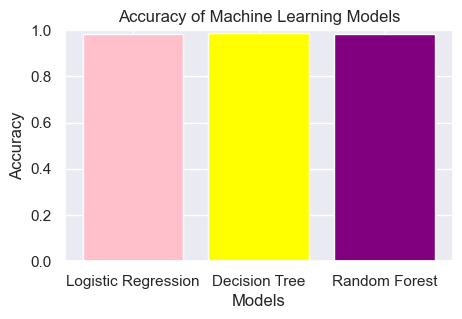

In [40]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lg_accuracy, dtc_accuracy, rfc_accuracy]

plt.figure(figsize=(5, 3))
plt.bar(models, accuracies, color=['pink', 'yellow', 'purple'])
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()








In [27]:
#hence I've taken three algorithem for this dataset and as per my project i've found that among these three decision tree has 
#the most accuracy...

In [ ]:
#summary
By doing this project we have analyze the data and_find out the required answer from_the respective given, hence there I 
use matplotlib,scikit learn,seaborn libraries and_also I have tried data cleaning & feature engineering for a better result
in machine learning algorithem I have taken three machine learning algorithem Decision Tree,Random Forest,Logistic regression
where decision tree has the most accuracy for this given dataset.